<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.028018,198.744842,198.768724,-0.023882
1,0.0,1.0,57.329540,88.266135,33.974483,-0.101213,189.468946,189.549901,-0.080955
2,0.0,2.0,45.215694,22.043105,89.071799,0.690223,167.020820,166.355867,0.664953
3,0.0,3.0,69.375325,71.150993,24.742899,0.242466,175.511683,175.271125,0.240558
4,0.0,4.0,87.837297,47.725671,65.999025,-0.346266,211.215726,211.564380,-0.348654
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,0.218753,120.330628,120.037904,0.292724
249996,999.0,246.0,65.758199,97.986011,91.293587,-0.465133,264.572663,265.002896,-0.430233
249997,999.0,247.0,43.850566,82.988350,93.879229,0.420890,231.139035,230.626058,0.512977
249998,999.0,248.0,44.150395,26.941848,96.556657,-0.126735,177.522166,177.503148,0.019018


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  58.707153  61.211187 -0.028018  198.744842   
      1.0    57.329540  88.266135  33.974483 -0.101213  189.468946   
      2.0    45.215694  22.043105  89.071799  0.690223  167.020820   
      3.0    69.375325  71.150993  24.742899  0.242466  175.511683   
      4.0    87.837297  47.725671  65.999025 -0.346266  211.215726   
...                ...        ...        ...       ...         ...   
999.0 245.0  22.462586  64.986534  22.662754  0.218753  120.330628   
      246.0  65.758199  97.986011  91.293587 -0.465133  264.572663   
      247.0  43.850566  82.988350  93.879229  0.420890  231.139035   
      248.0  44.150395  26.941848  96.556657 -0.126735  177.522166   
      249.0  88.062161  23.980807  27.737661 -0.973684  148.806946   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.768724 -0.023882  
      1.0    189.549901 -0.080955  
      2.0    166.355867  0.664953  
      3.0    175.271125  0.240558  
      4.0    211.564380 -0.348654  
...                 ...       ...  
999.0 245.0  120.037904  0.292724  
      246.0  265.002896 -0.430233  
      247.0  230.626058  0.512977  
      248.0  177.503148  0.019018  
      249.0  149.785678 -0.978732  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  58.707153  61.211187 -0.028018  198.744842   
      1.0    57.329540  88.266135  33.974483 -0.101213  189.468946   
      2.0    45.215694  22.043105  89.071799  0.690223  167.020820   
      3.0    69.375325  71.150993  24.742899  0.242466  175.511683   
      4.0    87.837297  47.725671  65.999025 -0.346266  211.215726   
...                ...        ...        ...       ...         ...   
999.0 245.0  22.462586  64.986534  22.662754  0.218753  120.330628   
      246.0  65.758199  97.986011  91.293587 -0.465133  264.572663   
      247.0  43.850566  82.988350  93.879229  0.420890  231.139035   
      248.0  44.150395  26.941848  96.556657 -0.126735  177.522166   
      249.0  88.062161  23.980807  27.737661 -0.973684  148.806946   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.768724 -0.023882  
      1.0    189.549901 -0.080955  
      2.0    166.355867  0.664953  
      3.0    175.271125  0.240558  
      4.0    211.564380 -0.348654  
...                 ...       ...  
999.0 245.0  120.037904  0.292724  
      246.0  265.002896 -0.430233  
      247.0  230.626058  0.512977  
      248.0  177.503148  0.019018  
      249.0  149.785678 -0.978732  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.028018,198.744842,198.768724,-0.023882
1,0.0,1.0,57.329540,88.266135,33.974483,-0.101213,189.468946,189.549901,-0.080955
2,0.0,2.0,45.215694,22.043105,89.071799,0.690223,167.020820,166.355867,0.664953
3,0.0,3.0,69.375325,71.150993,24.742899,0.242466,175.511683,175.271125,0.240558
4,0.0,4.0,87.837297,47.725671,65.999025,-0.346266,211.215726,211.564380,-0.348654
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,0.218753,120.330628,120.037904,0.292724
249996,999.0,246.0,65.758199,97.986011,91.293587,-0.465133,264.572663,265.002896,-0.430233
249997,999.0,247.0,43.850566,82.988350,93.879229,0.420890,231.139035,230.626058,0.512977
249998,999.0,248.0,44.150395,26.941848,96.556657,-0.126735,177.522166,177.503148,0.019018


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  58.707153  61.211187 -0.028018  198.744842   
      1.0    57.329540  88.266135  33.974483 -0.101213  189.468946   
      2.0    45.215694  22.043105  89.071799  0.690223  167.020820   
      3.0    69.375325  71.150993  24.742899  0.242466  175.511683   
      4.0    87.837297  47.725671  65.999025 -0.346266  211.215726   
...                ...        ...        ...       ...         ...   
999.0 245.0  22.462586  64.986534  22.662754  0.218753  120.330628   
      246.0  65.758199  97.986011  91.293587 -0.465133  264.572663   
      247.0  43.850566  82.988350  93.879229  0.420890  231.139035   
      248.0  44.150395  26.941848  96.556657 -0.126735  177.522166   
      249.0  88.062161  23.980807  27.737661 -0.973684  148.806946   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.768724 -0.023882  
      1.0    189.549901 -0.080955  
      2.0    166.355867  0.664953  
      3.0    175.271125  0.240558  
      4.0    211.564380 -0.348654  
...                 ...       ...  
999.0 245.0  120.037904  0.292724  
      246.0  265.002896 -0.430233  
      247.0  230.626058  0.512977  
      248.0  177.503148  0.019018  
      249.0  149.785678 -0.978732  

[250000 rows x 7 columns]

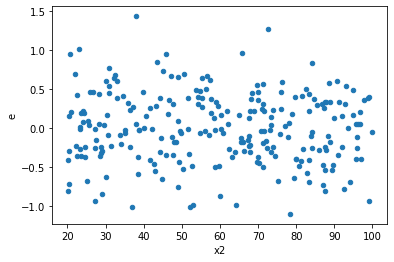

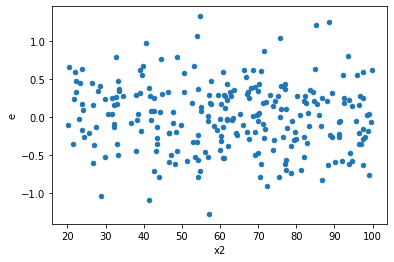

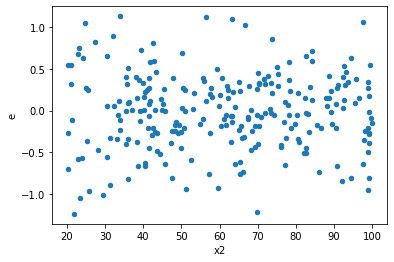

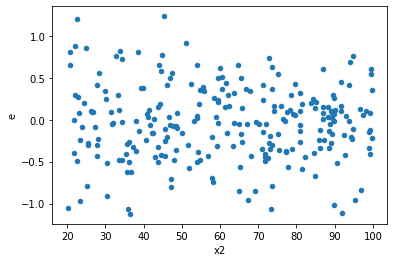

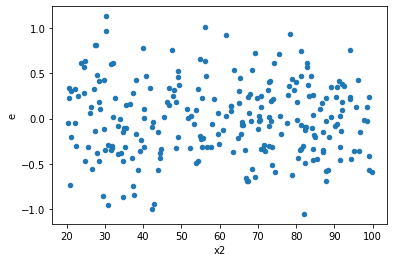

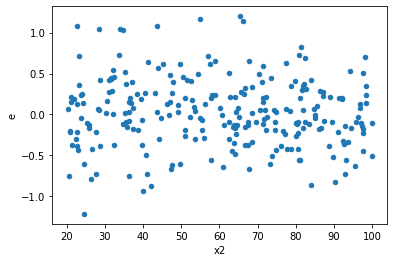

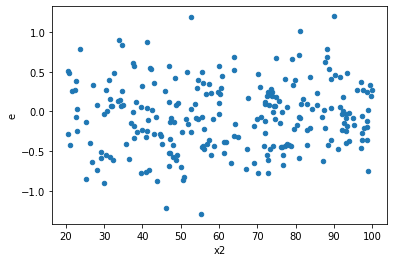

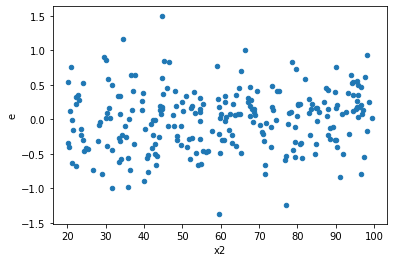

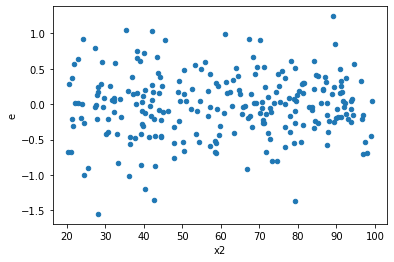

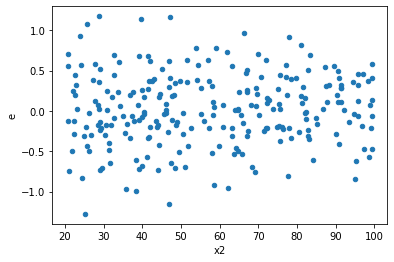

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,137.0,107.0,27.029637192558507,21.692577168065327,0.19729662184349275,0.2027343660566853,1.0275612636566382,0.8877640662172546,0.5561179668913727,0.4438820331086273,Reject005=1 : Homoscedasticity
1.0,105.0,139.0,19.07396389843187,27.629472941295255,0.18165679903268447,0.19877318662802343,1.094223765289728,0.6164602081382511,0.6917698959308745,0.30823010406912554,Reject005=1 : Homoscedasticity
5.0,128.0,116.0,21.766138847587953,20.614573951042672,0.17004795974678089,0.17771184440554028,1.0450689597815328,0.8106482899721821,0.594675855013909,0.40532414498609104,Reject005=1 : Homoscedasticity
7.0,109.0,135.0,18.552352863759488,26.62311362792774,0.17020507214458247,0.19720824909576104,1.158650835788492,0.4149676036689427,0.7925161981655287,0.20748380183447135,Reject005=1 : Homoscedasticity
12.0,148.0,96.0,25.798027959176913,21.60640477157298,0.17431099972416833,0.22506671637055187,1.2911790806472336,0.17740712426135974,0.9112964378693201,0.08870356213067987,Reject005=1 : Homoscedasticity
15.0,127.0,117.0,21.486248870462994,25.710202163353866,0.16918306197214955,0.21974531763550312,1.2988612162113309,0.15189243459261403,0.924053782703693,0.07594621729630702,Reject005=1 : Homoscedasticity
16.0,115.0,129.0,18.96421492270325,28.935205096294723,0.1649062167191587,0.22430391547515288,1.360190779569885,0.0895525703051665,0.9552237148474167,0.04477628515258325,Reject005=1 : Homoscedasticity
17.0,123.0,121.0,17.927382089380835,25.802932073696653,0.14575107389740516,0.21324737250988968,1.4630929763165619,0.03666609265028087,0.9816669536748596,0.018333046325140434,Reject005=0 : Heteroscedasticity
19.0,125.0,119.0,24.48798870965804,33.34570210652138,0.19590390967726432,0.28021598408841497,1.4303746390260812,0.04969641040499706,0.9751517947975015,0.02484820520249853,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,137.0,107.0,27.029637192558507,21.692577168065327,0.19729662184349275,0.2027343660566853,1.0275612636566382,0.8877640662172546,Reject005=1 : Homoscedasticity
1.0,105.0,139.0,19.07396389843187,27.629472941295255,0.18165679903268447,0.19877318662802343,1.094223765289728,0.6164602081382511,Reject005=1 : Homoscedasticity
2.0,135.0,109.0,29.247810270244777,20.471308964560755,0.2166504464462576,0.18781017398679592,0.8668810845648739,0.428965640488313,Reject005=1 : Homoscedasticity
3.0,122.0,122.0,25.382976495584238,22.86544974552523,0.20805718439003473,0.18742171922561662,0.9008183003873886,0.5649247603196124,Reject005=1 : Homoscedasticity
4.0,126.0,118.0,23.589705949208284,18.151965735355837,0.18721988848578003,0.1538302180962359,0.8216553238034847,0.2782250081152523,Reject005=1 : Homoscedasticity
5.0,128.0,116.0,21.766138847587953,20.614573951042672,0.17004795974678089,0.17771184440554028,1.0450689597815328,0.8106482899721821,Reject005=1 : Homoscedasticity
6.0,130.0,114.0,29.495112388808135,15.908146803512555,0.22688547991390873,0.13954514739923293,0.6150466193437459,0.007403269894776296,Reject005=0 : Heteroscedasticity
7.0,109.0,135.0,18.552352863759488,26.62311362792774,0.17020507214458247,0.19720824909576104,1.158650835788492,0.4149676036689427,Reject005=1 : Homoscedasticity
8.0,99.0,145.0,20.509225447465152,29.306631082724774,0.20716389340873892,0.2021146971222398,0.9756270448319054,0.9030229070032149,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      837
Reject005=0 : Heteroscedasticity    163
Name: Result_test, dtype: int64